Step1. 데이터 불러오기

In [75]:
# 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') #한글폰트 설정
plt.rc('axes', unicode_minus=False) #마이너스 기호 표시


df = pd.read_csv('https://raw.githubusercontent.com/zzhining/python_ml_dl/main/dataset/exercise4.csv')
df.head()

,평균 주택 면적,교통 편의지수,교육 점수,인구 밀집도,평균 주택 가격
0,83.910,16.0,67.021277,31.346578,34.8
1,88.920,24.0,55.319149,38.714128,36.6
2,95.925,96.0,80.851064,31.843267,43.4
3,100.170,16.0,36.170213,12.527594,57.2
4,92.430,8.0,22.340426,15.728477,48.2


Step2. 데이터 탐색

In [77]:
df.describe()

,평균 주택 면적,교통 편의지수,교육 점수,인구 밀집도,평균 주택 가격
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,94.228740,37.976000,62.238298,30.096302,45.058000
std,10.544196,34.710359,23.038239,19.632020,18.237724
min,53.415000,4.000000,0.000000,0.000000,10.000000
25%,88.245000,16.000000,50.797872,14.514349,34.200000
50%,93.127500,20.000000,68.085106,26.572848,42.400000
75%,99.307500,96.000000,80.851064,41.901214,50.000000
max,131.700000,96.000000,100.000000,100.000000,100.000000


/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JE

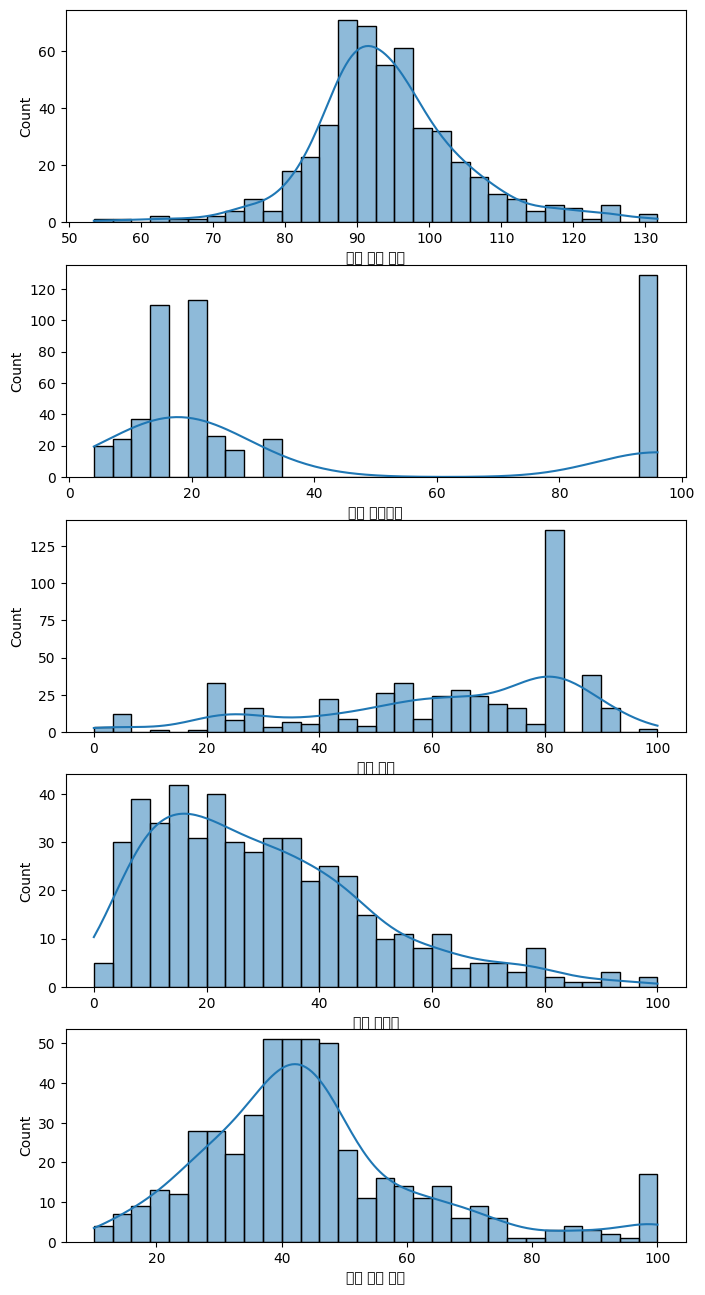

In [78]:
# 히스토그램
nrows = 5
ncols = 1

fig, axs = plt.subplots(nrows, ncols)
fig.set_size_inches(8, 16)

for i in range(len(df.columns)):
  sns.histplot(x=df.columns[i], data=df, kde=True, bins=30, ax=axs[i])

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JE

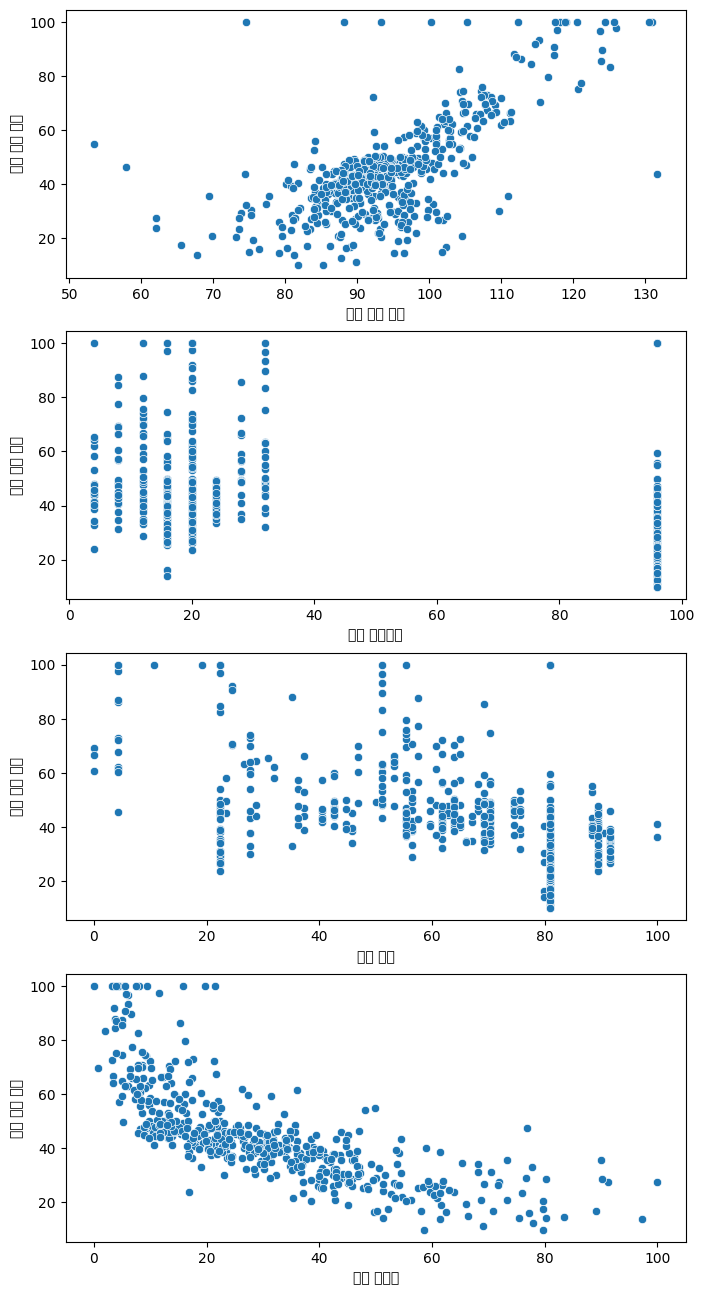

In [79]:
# 산점도
nrows = 4
ncols = 1

fig, axs = plt.subplots(nrows, ncols)
fig.set_size_inches(8, 16)

for i in range(len(df.columns) - 1):
    sns.scatterplot(x=df.columns[i], y='평균 주택 가격', data=df, ax=axs[i])

In [80]:
# 상관관계 확인
df.corr()

,평균 주택 면적,교통 편의지수,교육 점수,인구 밀집도,평균 주택 가격
평균 주택 면적,1.000000,-0.209952,-0.350765,-0.616391,0.694622
교통 편의지수,-0.209952,1.000000,0.462282,0.481111,-0.374742
교육 점수,-0.350765,0.462282,1.000000,0.368140,-0.500726
인구 밀집도,-0.616391,0.481111,0.368140,1.000000,-0.734713
평균 주택 가격,0.694622,-0.374742,-0.500726,-0.734713,1.000000


/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw

<Axes: >

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JE

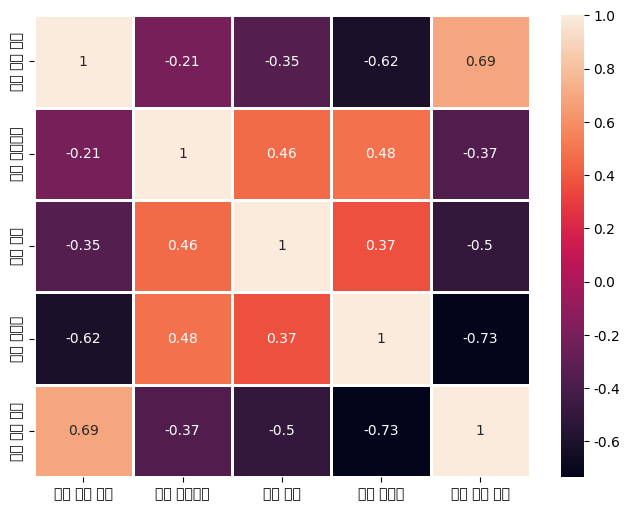

In [81]:
# 데이터 분포 확인 - 변수 간 상관관계(히트맵)
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), linewidths=1, annot=True)

In [82]:
np.abs(df.corr()['평균 주택 가격']).sort_values(ascending = False)

,평균 주택 가격
평균 주택 가격,1.000000
인구 밀집도,0.734713
평균 주택 면적,0.694622
교육 점수,0.500726
교통 편의지수,0.374742


In [83]:
df.sort_values(by=['평균 주택 가격']).tail()

,평균 주택 면적,교통 편의지수,교육 점수,인구 밀집도,평균 주택 가격
460,100.245,96.0,80.851064,5.518764,100.0
152,130.875,32.0,51.063830,8.002208,100.0
441,117.465,12.0,55.319149,7.505519,100.0
439,118.845,4.0,10.638298,3.945916,100.0
61,118.935,20.0,22.340426,5.435982,100.0


In [84]:
df.isna().sum()

,0
평균 주택 면적,0
교통 편의지수,0
교육 점수,0
인구 밀집도,0
평균 주택 가격,0


In [85]:
df.duplicated().sum()

np.int64(0)

step3. 데이터 전처리

In [86]:
target = df.pop('평균 주택 가격')

In [87]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(df)

In [91]:
from sklearn.model_selection import train_test_split
X_tr, X_test, y_tr, y_test = train_test_split(X_scaled, target, test_size=0.2, random_state=0)
print(X_tr.shape, y_tr.shape, X_test.shape, y_test.shape)

(400, 4) (400,) (100, 4) (100,)


Step4. 학습

In [92]:
# LinearRegressor
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_tr,y_tr)

print('weight:', lr.coef_)
print('bias:', lr.intercept_)

weight: [ 6.48143286  0.57719076 -3.89932896 -7.95126834]
bias: 45.437449930173265


In [94]:
coef = pd.Series(data=np.round(lr.coef_, 1), index=df.columns)
coef

,0
평균 주택 면적,6.5
교통 편의지수,0.6
교육 점수,-3.9
인구 밀집도,-8.0


<Axes: ylabel='None'>

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JE

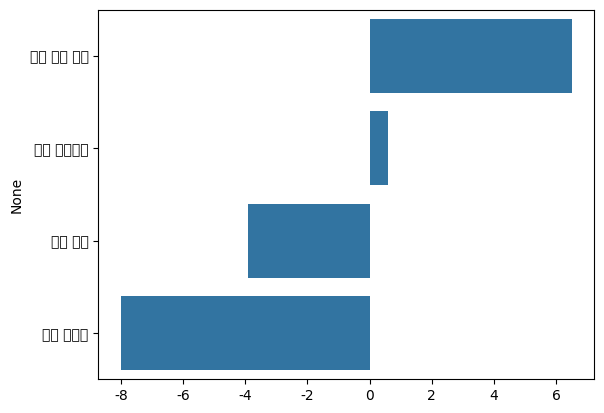

In [95]:
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

Step5. 평가

In [98]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lr.predict(X_test)
def printRegressorResult(y_test, y_pred):
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)
  print('MSE : {0:.3f} , RMSE : {1:3f}, r2 : {2:.3f}'.format(mse, rmse, r2))
printRegressorResult(y_test, y_pred)

MSE : 69.615 , RMSE : 8.343533, r2 : 0.707


In [99]:
# 실제값과 예측값 얼마나 차이나는지 확인
result = pd.DataFrame({'y' : y_test.values,
                       'y_pred' : y_pred,
                       'diff' : np.abs(y_test.values - y_pred)})
result.sort_values('diff', ascending=False).head()

,y,y_pred,diff
54,46.2,20.148792,26.051208
1,72.4,48.469648,23.930352
93,33.0,56.310912,23.310912
31,97.0,76.206563,20.793437
94,19.2,38.847013,19.647013


In [118]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state=0)
rf.fit(X_tr, y_tr)

RandomForestRegressor(random_state=0)

In [120]:
# lightgbm
from lightgbm import LGBMRegressor
lgb = LGBMRegressor(n_estimators=100, random_state=0, verbose=-1)
lgb.fit(X_tr, y_tr)

LGBMRegressor(random_state=0, verbose=-1)

Step6. 성능개선

In [101]:
# 독립변수 선택
from sklearn.feature_selection import SelectKBest, f_regression

# k=3 선택
X_selected = SelectKBest(score_func = f_regression, k=3)
X_selected.fit_transform(df,target)
features = df.columns[X_selected.get_support()]
print('features = {}'.format(features))

features = Index(['평균 주택 면적', '교육 점수', '인구 밀집도'], dtype='object')


In [102]:
# best3 만 활용하여 회귀
X_selected = df[features].copy()
X_tr, X_test, y_tr, y_test = train_test_split(X_selected, target, test_size=0.2, random_state=0)
lr2 = LinearRegression()
lr2.fit(X_tr,y_tr)
y_pred = lr2.predict(X_test)
printRegressorResult(y_test, y_pred)

MSE : 68.716 , RMSE : 8.289520, r2 : 0.710


In [103]:
# 다항회귀 모델
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_selected)
X_tr, X_test, y_tr, y_test = train_test_split(X_poly, target, test_size=0.2, random_state=0)
lr3 = LinearRegression()
lr3.fit(X_tr,y_tr)
y_pred = lr3.predict(X_test)
printRegressorResult(y_test, y_pred)

MSE : 48.701 , RMSE : 6.978578, r2 : 0.795


<Axes: xlabel='평균 주택 가격', ylabel='Count'>

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JE

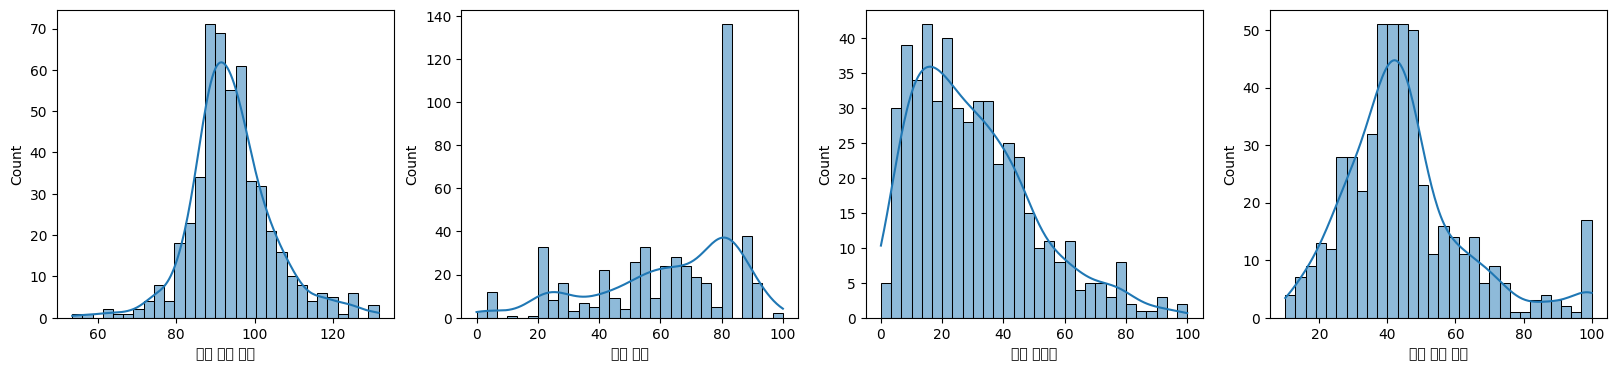

In [108]:
# 스케일 변환

# 데이터 분포 확인 - 히스토그램
nrows = 1
ncols = 4
fig, axs = plt.subplots(nrows, ncols)
fig.set_size_inches(20,4)

sns.histplot(x= X_selected.columns[0], data = X_selected, kde=True, bins=30, ax=axs[0])
sns.histplot(x= X_selected.columns[1], data = X_selected, kde=True, bins=30, ax=axs[1])
sns.histplot(x= X_selected.columns[2], data = X_selected, kde=True, bins=30, ax=axs[2])
sns.histplot(x= target, data = df, kde=True, bins=30, ax=axs[3])

In [111]:
# 왼쪽으로 치우쳐진 인구밀집도 <- 로그 변환
X_selected['인구 밀집도'] = np.log1p(X_selected['인구 밀집도'])
target = np.log1p(target)

평균 주택 면적    0.399375
교육 점수      -0.797798
인구 밀집도     -2.942424
dtype: float64


NameError: name 'y' is not defined

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JE

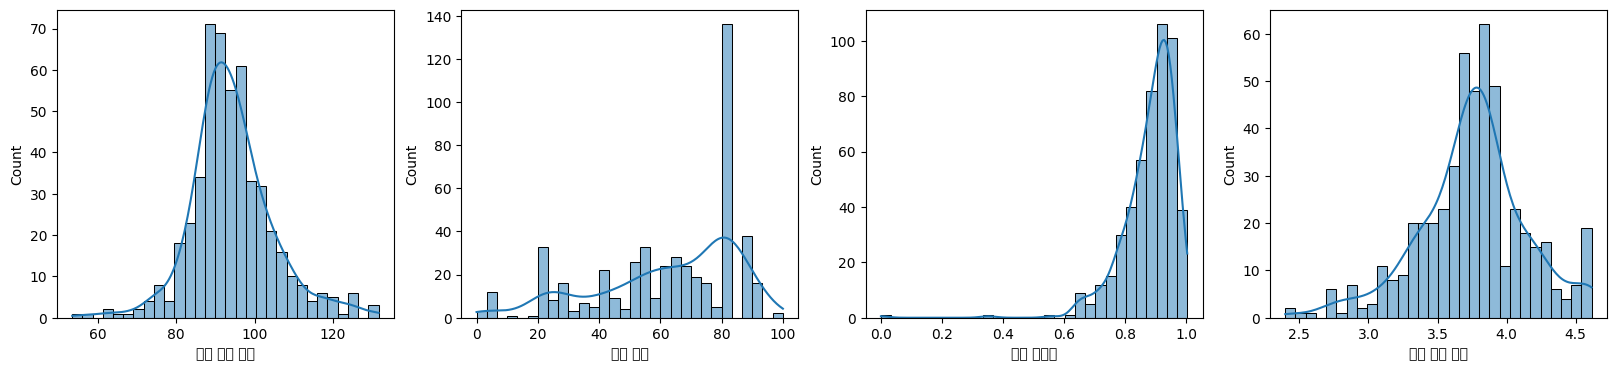

In [113]:
# 데이터 분포 확인 - 히스토그램
nrows = 1
ncols = 4

fig, axs = plt.subplots(nrows, ncols)
fig.set_size_inches(20, 4)

sns.histplot(x= X_selected.columns[0], data = X_selected, kde=True, bins=30, ax=axs[0])
sns.histplot(x= X_selected.columns[1], data = X_selected, kde=True, bins=30, ax=axs[1])
sns.histplot(x= X_selected.columns[2], data = X_selected, kde=True, bins=30, ax=axs[2])
sns.histplot(x= target, data = df, kde=True, bins=30, ax=axs[3])

print(X_selected.skew())
print('\n평균 주택 가격: {0:.2f}'.format(y.skew()))

In [115]:
X_tr, X_test, y_tr, y_test = train_test_split(X_selected, target, test_size=0.3, random_state=42)

lr_model3 = LinearRegression()
lr_model3.fit(X_tr, y_tr)

y_pred = lr_model3.predict(X_test)
mse = mean_squared_error(np.expm1(y_test), np.expm1(y_pred))
rmse = np.sqrt(mse)
r2 = r2_score(np.expm1(y_test), np.expm1(y_pred))
print('MSE : {0:.3f} , RMSE : {1:.3f}, r2 : {2:.3f}'.format(mse , rmse, r2))

MSE : 110.361 , RMSE : 10.505, r2 : 0.649


In [117]:
# 교차검증
from sklearn.model_selection import cross_validate

# cv: 3개의 train, test set fold 로 나누어 학습
scores = cross_validate(lr, df, target, scoring="neg_mean_squared_error", cv=3, return_train_score=True, return_estimator=True)
print('Scores', scores)

mse = (-1 * scores['train_score'])
print('MSE:', mse)

rmse  = np.sqrt(-1 * scores['train_score'])
print('RMSE:', rmse)

print('RMSE 평균: {0:.3f} '.format(np.mean(rmse)))

Scores {'fit_time': array([0.00844049, 0.00325203, 0.00327849]), 'score_time': array([0.00276494, 0.0026114 , 0.00239682]), 'estimator': [LinearRegression(), LinearRegression(), LinearRegression()], 'test_score': array([-0.03280526, -0.0446345 , -0.05962279]), 'train_score': array([-0.05095414, -0.04485816, -0.03722167])}
MSE: [0.05095414 0.04485816 0.03722167]
RMSE: [0.22573024 0.21179746 0.19292918]
RMSE 평균: 0.210 


In [123]:
# 나부 기반 회귀 모델 결과 확인
model_list = [lr, rf, lgb]

for model in model_list:
    model.fit(X_tr , y_tr)
    y_preds = model.predict(X_test)
    mse = mean_squared_error(y_test, y_preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_preds)
    model_name = model.__class__.__name__
    print('{0} MSE : {1:.3f} , RMSE : {2:.3f}, r2 : {3:.3f}'.format(model_name, mse , rmse, r2))

LinearRegression MSE : 0.068 , RMSE : 0.261, r2 : 0.566
RandomForestRegressor MSE : 0.044 , RMSE : 0.211, r2 : 0.718
LGBMRegressor MSE : 0.043 , RMSE : 0.208, r2 : 0.726


In [125]:
# lightgbm Early stop

lgb_model2 = LGBMRegressor(n_estimators=100, random_state=0, early_stopping_round=100, verbose=1)
evals = [(X_tr , y_tr), (X_test, y_test)]
lgb_model2.fit(X_tr, y_tr, eval_set=evals)
y_preds = lgb_model2.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_preds)
print('MSE : {0:.3f} , RMSE : {1:.3f}, r2 : {2:.3f}'.format(mse , rmse, r2))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 268
[LightGBM] [Info] Number of data points in the train set: 350, number of used features: 3
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 3.775011
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='l2'>

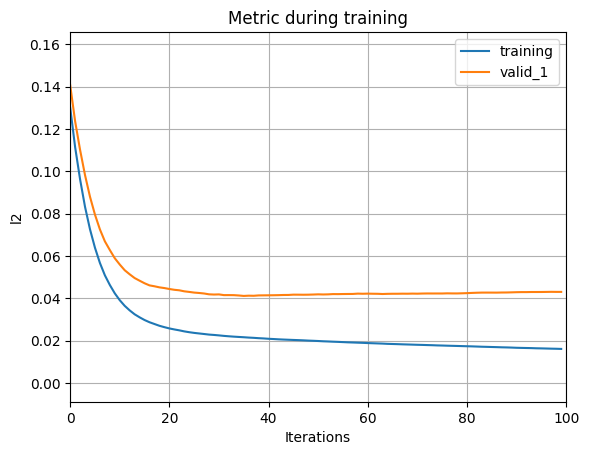

In [126]:
import lightgbm as lgb
lgb.plot_metric(lgb_model2)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50977 (\N{HANGUL SYLLABLE YUG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}

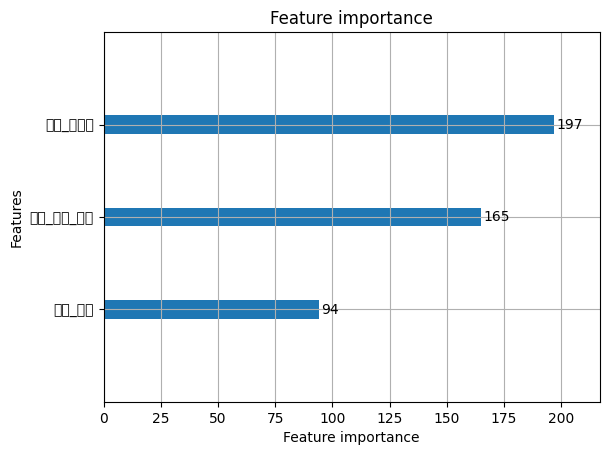

In [127]:
lgb.plot_importance(lgb_model2)